Metrics per class:
Class BackSpace: {'accuracy': 0.9933797909407666, 'precision': 0.8961748633879781, 'recall': 1.0, 'f1_score': 0.9452449567723343}
Class f: {'accuracy': 0.98397212543554, 'precision': 0.4375, 'recall': 0.9722222222222222, 'f1_score': 0.603448275862069}
Class t: {'accuracy': 0.9954703832752613, 'precision': 0.9090909090909091, 'recall': 0.970873786407767, 'f1_score': 0.9389671361502347}
Class space: {'accuracy': 0.9261324041811847, 'precision': 0.6023622047244095, 'recall': 0.9683544303797469, 'f1_score': 0.7427184466019418}
Class n: {'accuracy': 0.9909407665505227, 'precision': 0.7757009345794392, 'recall': 0.9764705882352941, 'f1_score': 0.8645833333333334}
Class h: {'accuracy': 0.9986062717770035, 'precision': 0.9318181818181818, 'recall': 0.9761904761904762, 'f1_score': 0.9534883720930233}
Class r: {'accuracy': 0.9912891986062717, 'precision': 0.7757009345794392, 'recall': 0.9880952380952381, 'f1_score': 0.8691099476439791}
Class idle: {'accuracy': 0.79547038327526

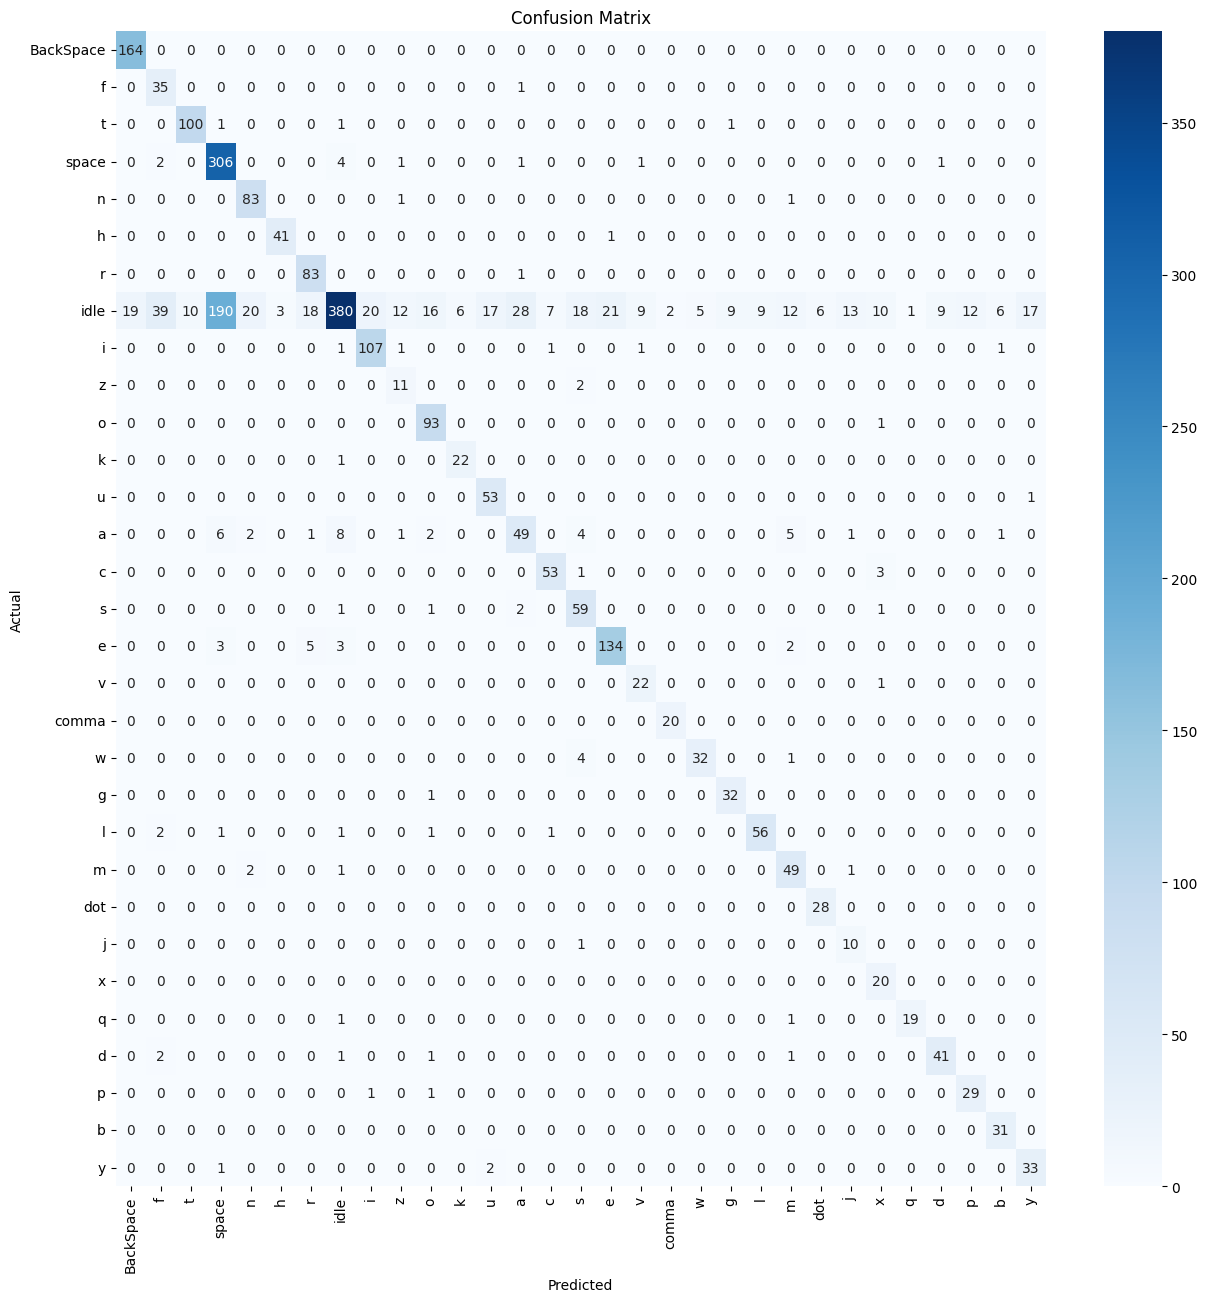

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Read the CSV file
df = pd.read_csv('test_results.csv')

# Ensure the column names are correct
assert 'target' in df.columns, "Column 'target' not found in the CSV"
assert 'pred' in df.columns, "Column 'pred' not found in the CSV"

# Calculate per-class metrics
unique_classes = df['target'].unique()
metrics_per_class = {}

for cls in unique_classes:
    # Get the binary true/false for the current class
    y_true = (df['target'] == cls).astype(int)
    y_pred = (df['pred'] == cls).astype(int)
    
    metrics_per_class[cls] = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, zero_division=0),
        'recall': recall_score(y_true, y_pred, zero_division=0),
        'f1_score': f1_score(y_true, y_pred, zero_division=0)
    }

# Calculate overall metrics
overall_accuracy = accuracy_score(df['target'], df['pred'])
overall_precision = precision_score(df['target'], df['pred'], average='weighted', zero_division=0)
overall_recall = recall_score(df['target'], df['pred'], average='weighted', zero_division=0)
overall_f1 = f1_score(df['target'], df['pred'], average='weighted', zero_division=0)

# Print the metrics
print("Metrics per class:")
for cls, metrics in metrics_per_class.items():
    print(f"Class {cls}: {metrics}")

print("\nOverall Metrics:")
print(f"Accuracy: {overall_accuracy}")
print(f"Precision: {overall_precision}")
print(f"Recall: {overall_recall}")
print(f"F1 Score: {overall_f1}")

# Draw the confusion matrix and heat map
conf_matrix = confusion_matrix(df['target'], df['pred'], labels=unique_classes)
plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=unique_classes, yticklabels=unique_classes, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [4]:
from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(df['target'], df['pred'], output_dict=True)

# Print the per-class and overall metrics
print("Classification Report:")
print(classification_report(df['target'], df['pred']))

Classification Report:
              precision    recall  f1-score   support

           ,       1.00      0.44      0.61        25
           .       1.00      0.10      0.19        48
   BackSpace       0.96      0.98      0.97       367
         [i]       0.76      0.93      0.83       709
         [s]       0.70      0.98      0.82       634
           a       0.93      0.91      0.92       247
           b       1.00      0.47      0.64        38
           c       0.94      0.91      0.92       114
           d       0.98      0.84      0.90       111
           e       0.89      0.93      0.91       391
           f       1.00      0.40      0.57        60
           g       0.97      0.46      0.62        63
           h       0.98      0.68      0.81        92
           i       0.87      0.95      0.91       260
           j       1.00      0.05      0.10        20
           k       1.00      0.47      0.64        36
           l       0.99      0.85      0.92       114
    

In [3]:
# Calculate per-class accuracy
per_class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

print("\nPer-Class Accuracy:")
for cls, accuracy in zip(df['target'].unique(), per_class_accuracy):
    print(f"Class {cls}: {accuracy:.2f}")



Per-Class Accuracy:
Class BackSpace: 1.00
Class f: 0.97
Class t: 0.97
Class space: 0.97
Class n: 0.98
Class h: 0.98
Class r: 0.99
Class idle: 0.40
Class i: 0.96
Class z: 0.85
Class o: 0.99
Class k: 0.96
Class u: 0.98
Class a: 0.61
Class c: 0.93
Class s: 0.92
Class e: 0.91
Class v: 0.96
Class comma: 1.00
Class w: 0.86
Class g: 0.97
Class l: 0.90
Class m: 0.92
Class dot: 1.00
Class j: 0.91
Class x: 1.00
Class q: 0.90
Class d: 0.89
Class p: 0.94
Class b: 1.00
Class y: 0.92
